In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

#Experiment list


**'dynamic'** >> dynamic programming approach (no window size) <br>
**'naive-p-w3'** >> naive approach, parallel, window size = 3 <br>
**'naive-p-w7'** >> naive approach, parallel, window size = 7 <br>
**'naive-p-w11'**>> naive approach, parallel, window size = 11 <br>
**'naive-p-w3-norm'**>> naive approach, parallel, window size = 3, with normalization <br>
**'naive-p-w3-box'** >> naive approach, parallel, window size = 3, with boxfilter <br>
**'naive-w3'** >> naive approach, no parallel, window size = 3 <br>

<br>
The 3D pointcloud representation can be found in the out folder.

#Used metrics

**RMSE**
<br>
Root-mean-square error, estimates absolute errors. The lower, the better.
<br>
<br>
**PSNR**
<br>
Peak signal-to-noise ratio, estimates absolute errors. The higher, the better.
<br>
<br>
**SSIM**
Structural similarity index measure. As its name suggest, this measure tries to get some information out of the structure of the data. Especially for images, it is might be a better indicator than the previous two metrics. It considers spatial closeness, contextual information. Values are between 0 and 1, where 1 means exact match. Calculated based on [this article].(https://en.wikipedia.org/wiki/Structural_similarity).
<br>

# Data preparation

In [111]:
experiment_labels = ['dynamic','naive-p-w3','naive-p-w7','naive-p-w11', 'naive-p-w3-norm', 'naive-p-w3-box', 'naive-w3']
images = ['aloe', 'baby1', 'bowling1', 'cloth4', 'flowerpots', 'midd1']
proc_times =[

[3.34023,	6.12482,	31.8486,	82.1842,	11.0142,	10.8473,	22.4396],
[4.22762,	5.6648,		30.6931,	75.2707,	10.3452,	10.0454,	22.0468],
[2.5806,	6.27147,	31.329,		79.2472,	9.89631,	11.4012,	23.6997],
[2.76582,	6.84468,	34.1479,	86.0789,	11.2336,	11.3611,	24.6332],
[2.73343,	7.21349,	32.7589,	90.5764,	11.395,		11.6406,	23.3219],
[3.1712,	8.17749,	39.6753,	91.3622,	12.8771,	13.4161,	26.6162]

]

metrics = ['rmse', 'psnr', 'ssim']

metrics_avg = [[73.560667,	11.080530,	0.000116],		
[76.137017,	11.204067,	0.000055],		
[69.403550,	11.466868,	0.000090],		
[69.826850,	11.424293,	0.000098],		
[78.582400,	10.294053,	0.000032],		
[79.602283,	10.189480,	0.000027]]

rmse_val = [item[0] for item in metrics_avg]
psnr_val = [item[1] for item in metrics_avg]
ssim_val = [item[2] for item in metrics_avg]

In [54]:
suffixes = ['_dynamic','_w3_naive','_w7_naive','_w11_naive']
prefixes = ['norm_','box_']

# Visualization

##Processing time

### Average processing time per experiment

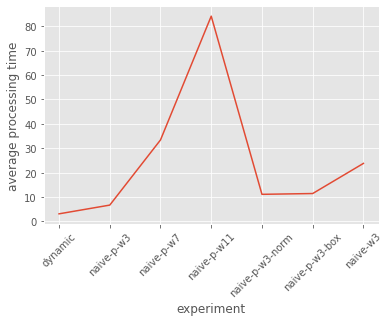

In [34]:
plt.plot(experiment_labels, np.average(proc_times,0))
plt.xticks(rotation=45)
plt.xlabel('experiment')
plt.ylabel('average processing time')
plt.show()

###Overall processing time per image, per experiment

On the y axis, we see the processing time, on the x axis the experiments
The darker the color, the higher the processing time. Consequently, we can see that the 'most expensive' image was the midd1 image and experiment nr. 4.

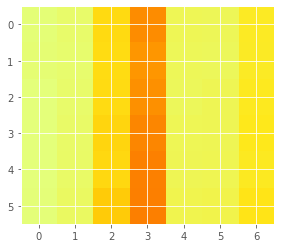

In [38]:
plt.imshow(proc_times, cmap='Wistia')
plt.show()

### Average processing time - window size

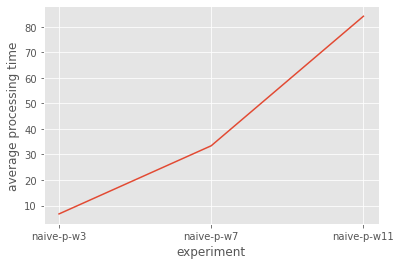

In [35]:
plt.plot(experiment_labels[1:4], np.average(proc_times,0)[1:4] )
plt.xlabel('experiment')
plt.ylabel('average processing time')
plt.show()

##Metrics

###RMSE

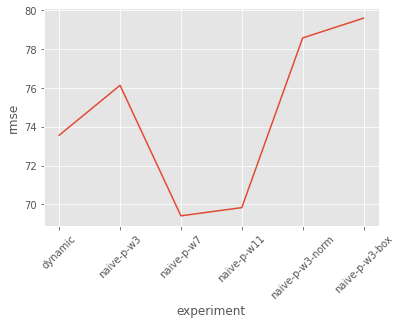

In [112]:
plt.plot(experiment_labels[:-1], rmse_val)
plt.xticks(rotation=45)
plt.xlabel('experiment')
plt.ylabel('rmse')
plt.show()

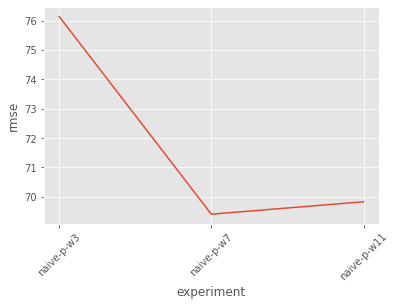

In [116]:
plt.plot(experiment_labels[1:4], rmse_val[1:4])
plt.xticks(rotation=45)
plt.xlabel('experiment')
plt.ylabel('rmse')
plt.show()

###PSNR

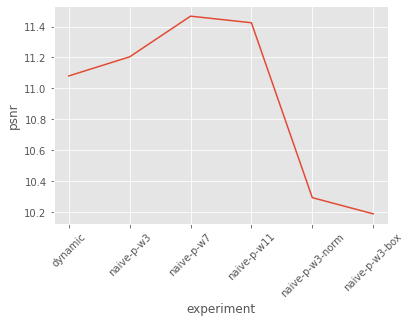

In [114]:
plt.plot(experiment_labels[:-1], psnr_val)
plt.xticks(rotation=45)
plt.xlabel('experiment')
plt.ylabel('psnr')
plt.show()

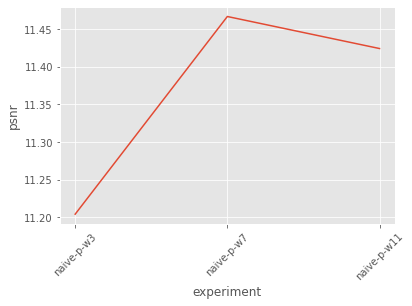

In [117]:
plt.plot(experiment_labels[1:4], psnr_val[1:4])
plt.xticks(rotation=45)
plt.xlabel('experiment')
plt.ylabel('psnr')
plt.show()

###SSIM

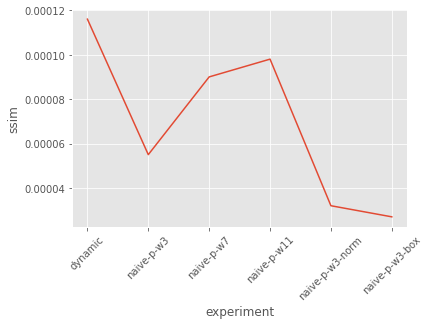

In [115]:
plt.plot(experiment_labels[:-1], ssim_val)
plt.xticks(rotation=45)
plt.xlabel('experiment')
plt.ylabel('ssim')
plt.show()

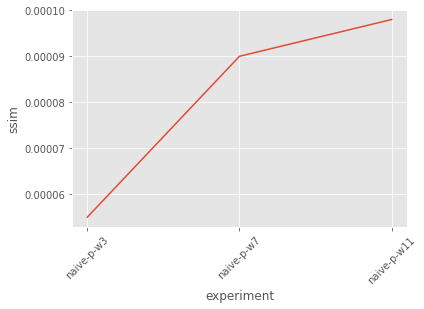

In [118]:
plt.plot(experiment_labels[1:4], ssim_val[1:4])
plt.xticks(rotation=45)
plt.xlabel('experiment')
plt.ylabel('ssim')
plt.show()

##Image results

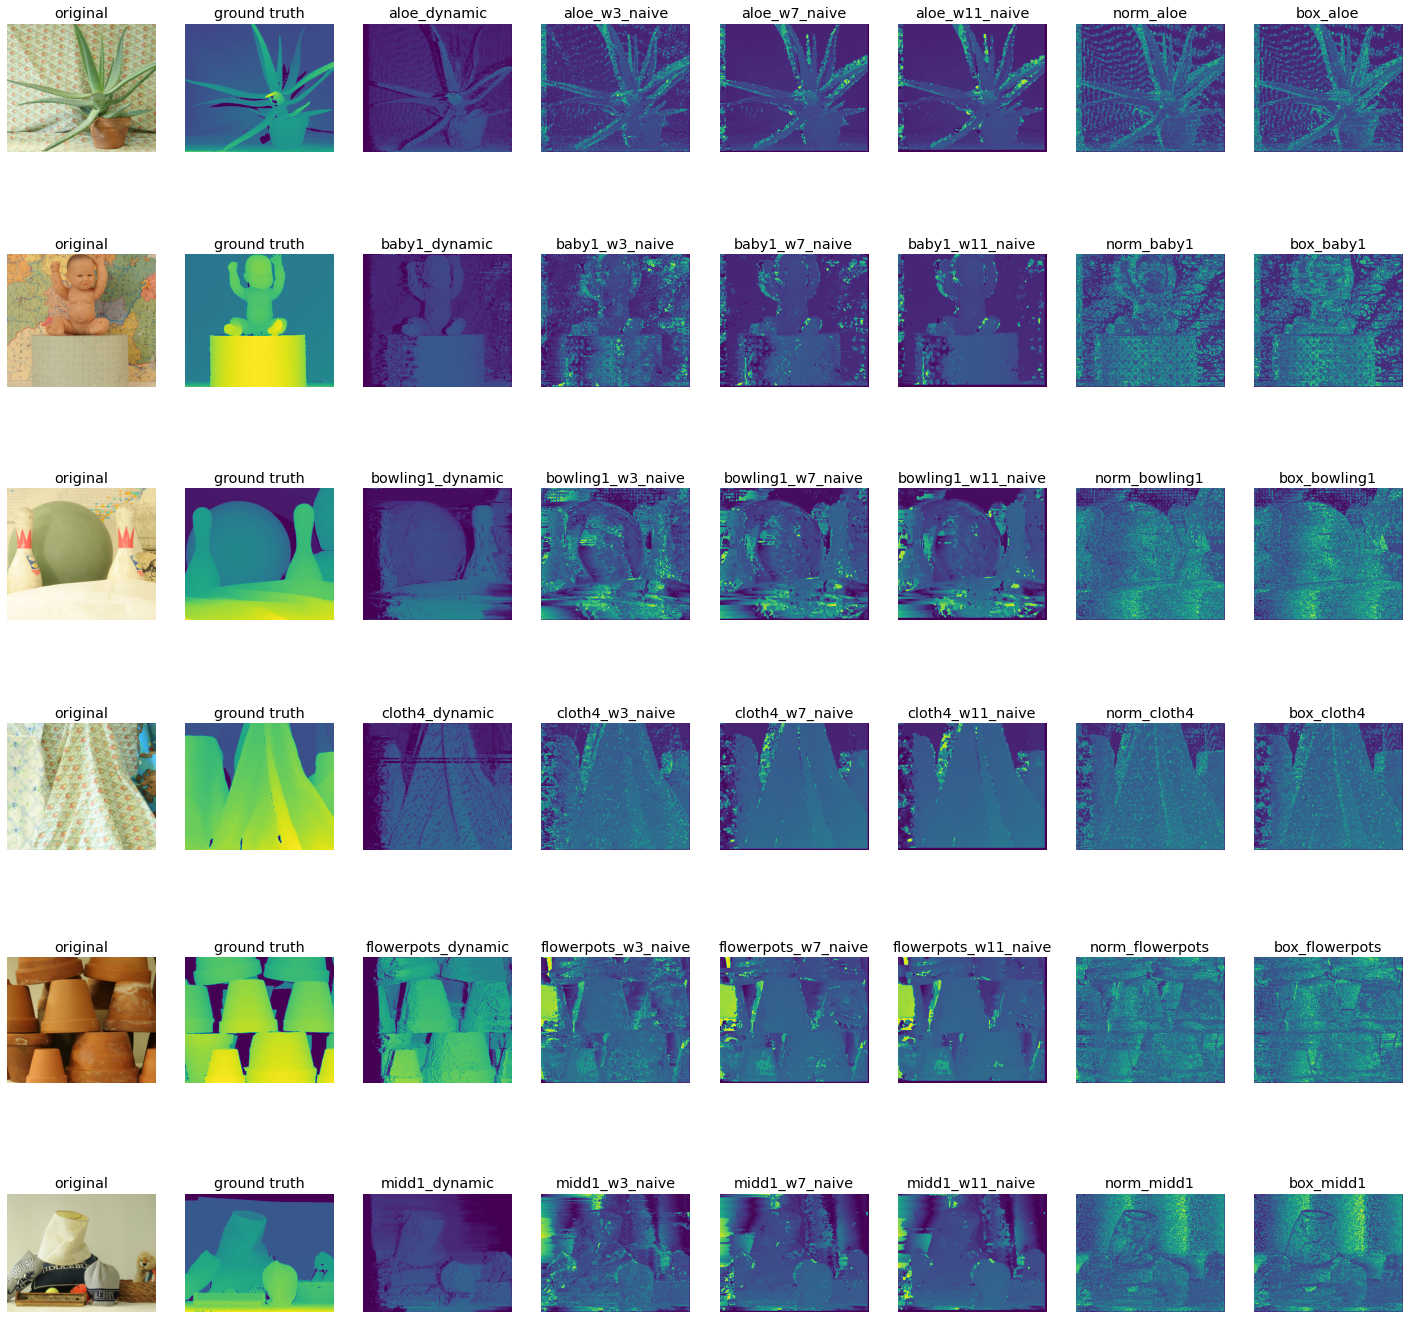

In [66]:
fig = plt.figure(figsize=(25, 25))
n=0
ax = []
for img_set in images:
  n+=1
  img = plt.imread('data/' +img_set + '/view1.png')
  ax.append(fig.add_subplot(6,8,n))
  ax[-1].set_title('original')
  plt.axis('off')
  plt.imshow(img)
  n+=1

  img = plt.imread('data/' +img_set + '/disp1.png')
  ax.append(fig.add_subplot(6,8,n))
  ax[-1].set_title('ground truth')
  plt.axis('off')
  plt.imshow(img)

  for s in suffixes:
    n+=1
    img = plt.imread(img_set + s + '.png')
    ax.append(fig.add_subplot(6,8,n))
    ax[-1].set_title(img_set + s)
    plt.axis('off')
    plt.imshow(img)
  for p in prefixes:
    n+=1
    img = plt.imread(p + img_set + suffixes[1] + '.png')
    ax.append(fig.add_subplot(6,8,n))
    ax[-1].set_title(p + img_set)
    plt.axis('off')
    plt.imshow(img)

plt.show()